In [1]:
# March 2022

# for communication

# twitter https://twitter.com/runaz_there

# Полезный код

In [2]:
# ! pip install missingno
# ! pip install mlxtend
# ! pip install researchpy
# ! pip install pingouin

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from mpl_toolkits import mplot3d
from statsmodels.tsa.seasonal import seasonal_decompose
import researchpy as rp
from mlxtend.evaluate import permutation_test
import pingouin as pg
from sklearn.linear_model import Lasso

from scipy import stats
from scipy.stats import chi2_contingency as stats

# Введение

Ниже представлен код, который либо не нашел применение в основной части методички, либо часто требуется. Примеры даны на данных Goodreads (там, где это возможно). 

Весь код поделен на темы. Пояснения к коду, там где это необходимо, даны за знаком #.

В отдельных случаях даны также смысловые пояснения по логике, математике и прочему. Однако эта методичка не может считаться введением как в логику, так и в математику. 

В тех случаях, когда нужно внести изменения в изначально загруженные данные, я использую копию данных.

# Получение данных. Создание таблиц. SQL

In [4]:
# настройка вывода в pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

In [5]:
db = pd.read_csv(os.getcwd() + '\\gd_augmentation.csv', 
    dtype = {'decade':'object','quarter':'object', 'tra_co':'object', 'multivolume':'object'}) 

## SQL

In [6]:
"""

# приводится для примера
# cоздание SQL таблицы

CREATE TABLE table_name (
 column_a data_type,
 column_b data_type,
 column_c data_type
);

"""

'\n\n# приводится для примера\n# cоздание SQL таблицы\n\nCREATE TABLE table_name (\n column_a data_type,\n column_b data_type,\n column_c data_type\n);\n\n'

In [7]:
"""

# приводится для примера
# порядок ввода запросов SQL

SELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross

FROM films

WHERE release_year > 1990

GROUP BY release_year

HAVING  AVG(budget) > 60000000

ORDER BY avg_gross DESC;

"""

'\n\n# приводится для примера\n# порядок ввода запросов SQL\n\nSELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross\n\nFROM films\n\nWHERE release_year > 1990\n\nGROUP BY release_year\n\nHAVING  AVG(budget) > 60000000\n\nORDER BY avg_gross DESC;\n\n'

In [8]:
"""

# приводится для примера
# соединяем разные таблицы SQL

query = 

SELECT * 

FROM hpd311calls

JOIN weather 

ON hpd311calls.created_date = weather.date;



calls_with_weather = pd.read_sql(query, engine)

print(calls_with_weather.head())

"""

'\n\n# приводится для примера\n# соединяем разные таблицы SQL\n\nquery = \n\nSELECT * \n\nFROM hpd311calls\n\nJOIN weather \n\nON hpd311calls.created_date = weather.date;\n\n\n\ncalls_with_weather = pd.read_sql(query, engine)\n\nprint(calls_with_weather.head())\n\n'

## URL

In [9]:
"""

# приводится для примера
# базовый запрос для получения данных из url

api_url = "https://api.yelp.com/v3/businesses/search"
response = requests.get(api_url, 
                headers=headers, 
                params=params)
 data = response.json()
cafes = pd.DataFrame(data['businesses'])
print(cafes.dtypes)

"""

'\n\n# приводится для примера\n# базовый запрос для получения данных из url\n\napi_url = "https://api.yelp.com/v3/businesses/search"\nresponse = requests.get(api_url, \n                headers=headers, \n                params=params)\n data = response.json()\ncafes = pd.DataFrame(data[\'businesses\'])\nprint(cafes.dtypes)\n\n'

## Создание и сохранение таблицы

In [10]:
# генератор
data1 = [{'a': i, 'b': 2 *i} for i in range(3)] 
pd.DataFrame(data1)

,a,b
0,0,0
1,1,2
2,2,4


Генераторы часто используются, например для создания новых признаков или создания датафрейма. 

Генератор разбивается на две части: 

1) что необходимо выполнить
2) для значений, полученных с помощью цикла. 

Здесь надо в словаре к ключу 'a' добавить просто каждый элемент из цикла, а к ключу 'b' надо добавить значение из цикла, умноженное на 2.

В приведенном примере легко создать датафрейм, так как датафреймы можно создавать из словаря, где ключ будет названием столбца, а значение ключа - наблюдением в датафрейме.

In [11]:
# пример работы генератора с отбором категориальных признаков
num_cols = [c for c in db.columns if db[c].dtype.name != 'object'] 

In [12]:
"""
# приводится для примера
# способ создать таблицу

coef = np.round(logreg.coef_, 3)
feat_labels = X_train.columns
for c, feature in zip(coef[0], feat_labels):
    print(feature, c)

"""

'\n# приводится для примера\n# способ создать таблицу\n\ncoef = np.round(logreg.coef_, 3)\nfeat_labels = X_train.columns\nfor c, feature in zip(coef[0], feat_labels):\n    print(feature, c)\n\n'

In [13]:
# сохраняю данные в таблицу
db.to_csv("goodreads_example.csv")

# Обработка данных

In [14]:
# извлекаю строки
db[8:10] 

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
8,the ultimate hitchhiker guide galaxy,4.38,eng,815,249558,4080,2000,2,0,1,46,0.0,1.0
9,the hitchhiker guide galaxy,4.22,eng,215,4930,460,2000,3,0,1,37,0.0,0.0


In [15]:
# извлекаю столбец
db['title'] 

0                   harry potter half blood prince
1                       harry potter order phoenix
2                     harry potter chamber secrets
3                    harry potter prisoner azkaban
4                   harry potter boxed set books 5
                           ...                    
10833    expelled eden a william t vollmann reader
10834                      you bright risen angels
10835                                the ice shirt
10836                                  poor people
10837                     las aventuras tom sawyer
Name: title, Length: 10838, dtype: object

In [16]:
# извлекаю несколько столбцов
db[['title', 'average_rating']] 

,title,average_rating
0,harry potter half blood prince,4.57
1,harry potter order phoenix,4.49
2,harry potter chamber secrets,4.42
3,harry potter prisoner azkaban,4.56
4,harry potter boxed set books 5,4.78
...,...,...
10833,expelled eden a william t vollmann reader,4.06
10834,you bright risen angels,4.08
10835,the ice shirt,3.96
10836,poor people,3.72


In [17]:
# извлекаю одновременно несколько строк и срез столбцов
db.loc[8:10, 'title':'ratings_count'] 

,title,average_rating,language_code,num_pages,ratings_count
8,the ultimate hitchhiker guide galaxy,4.38,eng,815,249558
9,the hitchhiker guide galaxy,4.22,eng,215,4930
10,the ultimate hitchhiker guide,4.38,eng,815,2877


In [18]:
# извлекаю одновременно несколько строк и список (не срез) столбцов
db.loc[8:10, ['title', 'language_code']] 

,title,language_code
8,the ultimate hitchhiker guide galaxy,eng
9,the hitchhiker guide galaxy,eng
10,the ultimate hitchhiker guide,eng


In [19]:
# подсчитываю уникальные значения по каждой категории
db['language_code'].value_counts()

eng      8669
en-US    1373
spa       217
en-GB     209
fre       142
         ... 
ara         1
nor         1
nl          1
tur         1
msa         1
Name: language_code, Length: 26, dtype: int64

In [20]:
# общее количество уникальных значений
db['title'].nunique() 

9968

In [21]:
# выбираю случайные значения из столбца
np.random.choice(db['num_pages'], 100, replace=False) 

array([ 391,  288,  288,  339,  235,  208,  269,  288,  101,  172,  262,
        352,  332,  332,   64,  404,  240,  451,  160,  326, 1096,   32,
        240,  195,  194,  444,  368,  480,  167,  456,   32,  282, 1264,
        202,  479,  225,  464,  694,  104,  144,  400,  255,  511,  505,
        192,  649,  230,  176,  336,  112,  128,  277,  516,  416,  282,
        144,  253,  352,  734,  164,  180,  338,  250,  385,  181,  184,
        143,  464,  261,  322,  447,  179,  361,  304,  408,  260,  384,
        191,  416,  256,  534,  518, 1021,  120,  340,  784,  222,   96,
         80,  160,  733,  480,  756,  304,  278,   64,  298,  176,  232,
        451], dtype=int64)

In [22]:
# возвращаю индекс минимума, можно и максимума
db['num_pages'].idxmin() 

784

In [23]:
# произвольное количество наибольших значений, наименьшие по nsmallest
db.nlargest(5, ['num_pages'])['title'] 

6301     the complete aubrey maturin novels
6602                   the second world war
10632               remembrance things past
6                   harry potter collection
6622                summa theologica 5 vols
Name: title, dtype: object

In [24]:
# извлекаю данные по логическому условию
db[db['average_rating'] > 4].head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000


In [25]:
# удаление по инедксу
db4 = db.copy()
db4 = db4.drop(index=[6389]) 

In [26]:
# излекаю данные по двум логическим условиям, которые пересекаются ("И")
db[(db['average_rating'] > 4) & (db['ratings_count'] > 1000)].head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000


Если дано два множества А и B, то пересечение означает, что берем только те элементы, которые принадлежат A и B одновременно. Важно отличать этот случай от объединения, когда берем те элементы, которые принадлежат как А, так и B, а также одновременно A и B (из этого также следует, что в объединении получаю и элементы, которые находятся в пересечении).

In [27]:
# пример удаления по названию 
db1 = db.copy()
db1 = db.query('title not in ["harry potter half blood prince", "harry potter order phoenix"]')

# если сравнить с таблицей выше, то видно
# что были удалены наблюдения под индексами 0 и 1
# в которых title соответствовал указанным значениям
db1.head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.0,0.0
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.0,0.0
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.0,0.0


In [28]:
# поиск в ячейках по значению
db[db['title'].str.contains('harry')].head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000


Данный код позволяет отобрать те наблюдения, у которых признак (здесь **title**) содержит какое-либо выражение. Здесь, например, отобраны все книги, в заголовке которых упоминается harry.

Хорошее введение по регулярным выражениям см. [здесь](https://developers.google.com/edu/python/regular-expressions). Больше про регулярные выражения появится в последующих редакциях методички.

In [29]:
# удаляю столбцы
db2 = db.copy()
db2 = db2.drop(["polarity", "subjectivity"], axis=1)
db2.head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40


In [30]:
# проверяю на соответствие условию
# можно взять также any
np.all(db["num_pages"] > 100)

False

All означает, что задаю такой вопрос: все ли значения количества страниц больше 100. Получаю ответ: нет. Если взять any, то вопрос будет: есть ли значения больше 100 в количестве страниц?

In [31]:
# случайный отбор данных из таблицы
db.sample(n=10, random_state=1).head(3) 

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
7265,blood meridian,4.17,eng,335,539,62,2000,3,0,0,14,0.0,0.0
662,tea jane austen,3.79,eng,128,1442,108,2000,3,1,0,20,0.0,0.0
7155,heartsnatcher,3.97,en-GB,245,2430,77,2000,4,1,0,13,0.0,0.0


In [32]:
# изменение типа данных
db2['tra_co'] = db2['tra_co'].astype('int')

In [33]:
# получить векторное представление датафрейма
db.values

array([['harry potter half blood prince', 4.57, 'eng', ..., 39,
        -0.1666666666666666, 0.1666666666666666],
       ['harry potter order phoenix', 4.49, 'eng', ..., 42, 0.0, 0.0],
       ['harry potter chamber secrets', 4.42, 'eng', ..., 40, 0.0, 0.0],
       ...,
       ['the ice shirt', 3.96, 'eng', ..., 14, 0.0, 0.0],
       ['poor people', 3.72, 'eng', ..., 11, -0.4, 0.6],
       ['las aventuras tom sawyer', 3.91, 'spa', ..., 27, 0.0, 0.0]],
      dtype=object)

# Создание новых признаков

In [34]:
# создание нового признака с помощью lambda функции
db2 = db.copy()
db2["example"] = db2["language_code"].apply(lambda x: "English" if "eng" in x else "other")
db2.head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,example
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,English
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,English
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000,English


Так как этот подход к созданию новых переменныъ очень распространен, то остановлюсь на нем подробнее. Что же здесь происходит?

1) указываю, что хочу создать новую переменную **db2["example"]**;
2) далее указываю, на основании какой имеющейся переменнной создаю новую, здесь это **db2["language_code"]**;
3) вызываю apply с лямбда-функцией. Эту функцию надо читать так: передаем x (lambda x:); функция должна вернуть новое значение ("English"), если выполняется условие (if "eng" in x), в противном случае возвращается другой вариант нового значения (else "other").

In [35]:
# разбиение на интервалы
db2['average_rating_dig'] = np.digitize(db2['average_rating'], bins=[0, 1, 2, 3, 4, 5])
db2.head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,example,average_rating_dig
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,English,5
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,English,5
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000,English,5


In [36]:
# выбираю только категориальные колонки
categorical_columns = [c for c in db.columns if db[c].dtype.name == 'object'] 

# замена категорй
db8 = db.copy()
db8['lcode'] = np.where((db8['language_code'] == 'jpn') | (db8['language_code'] == 'mul'), 'other', db8['language_code']) 

In [37]:
# использую map, чтобы создать колонку по ключевым словам из других
db12 = db.copy()
example = {'eng': 'English', 'spa':'Spanish'}
db12['example2'] = db12['language_code'].map(example)
db12.head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,example2
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,English
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,English
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000,English


In [38]:
"""
# приводится для примера
# бининг

bins = [0, 3, 4, 5, 6]
groups_names = ['Lower', 'Low', 'Average', 'High']
train['rat'] = pd.cut(train['average_rating'], bins, labels=groups_names, right=False)
test['rat'] = pd.cut(test['average_rating'], bins, labels=groups_names, right=False)

# автоматический бининг
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(encode='onehot-dense')
rat_train = kbd.fit_transform(X_train[['text_reviews_count']]) 
rat_test = kbd.transform(X_test[['text_reviews_count']]) 

"""

"\n# приводится для примера\n# бининг\n\nbins = [0, 3, 4, 5, 6]\ngroups_names = ['Lower', 'Low', 'Average', 'High']\ntrain['rat'] = pd.cut(train['average_rating'], bins, labels=groups_names, right=False)\ntest['rat'] = pd.cut(test['average_rating'], bins, labels=groups_names, right=False)\n\n# автоматический бининг\nfrom sklearn.preprocessing import KBinsDiscretizer\nkbd = KBinsDiscretizer(encode='onehot-dense')\nrat_train = kbd.fit_transform(X_train[['text_reviews_count']]) \nrat_test = kbd.transform(X_test[['text_reviews_count']]) \n\n"

# Обработка пропущенных значений

In [39]:
# проверка на пропущенные значения по всей таблице
# с подчсчетом количества пропусков
db.isna().sum() 

title             0
average_rating    0
language_code     0
num_pages         0
ratings_count     0
                 ..
tra_co            0
multivolume       0
len_title         0
polarity          0
subjectivity      0
Length: 13, dtype: int64

In [40]:
# создание пропуска
db7 = db.copy()
db7.loc['2006-09-16', 'average_rating'] = np.nan 

In [41]:
# заполнение пропусков в прямом порядке, bfill в обратном, 
# возможна также интерполяция
db['num_pages'] = db['num_pages'].fillna(method='ffill') 

title             0
average_rating    0
language_code     0
num_pages         0
ratings_count     0
                 ..
tra_co            0
multivolume       0
len_title         0
polarity          0
subjectivity      0
Length: 13, dtype: int64


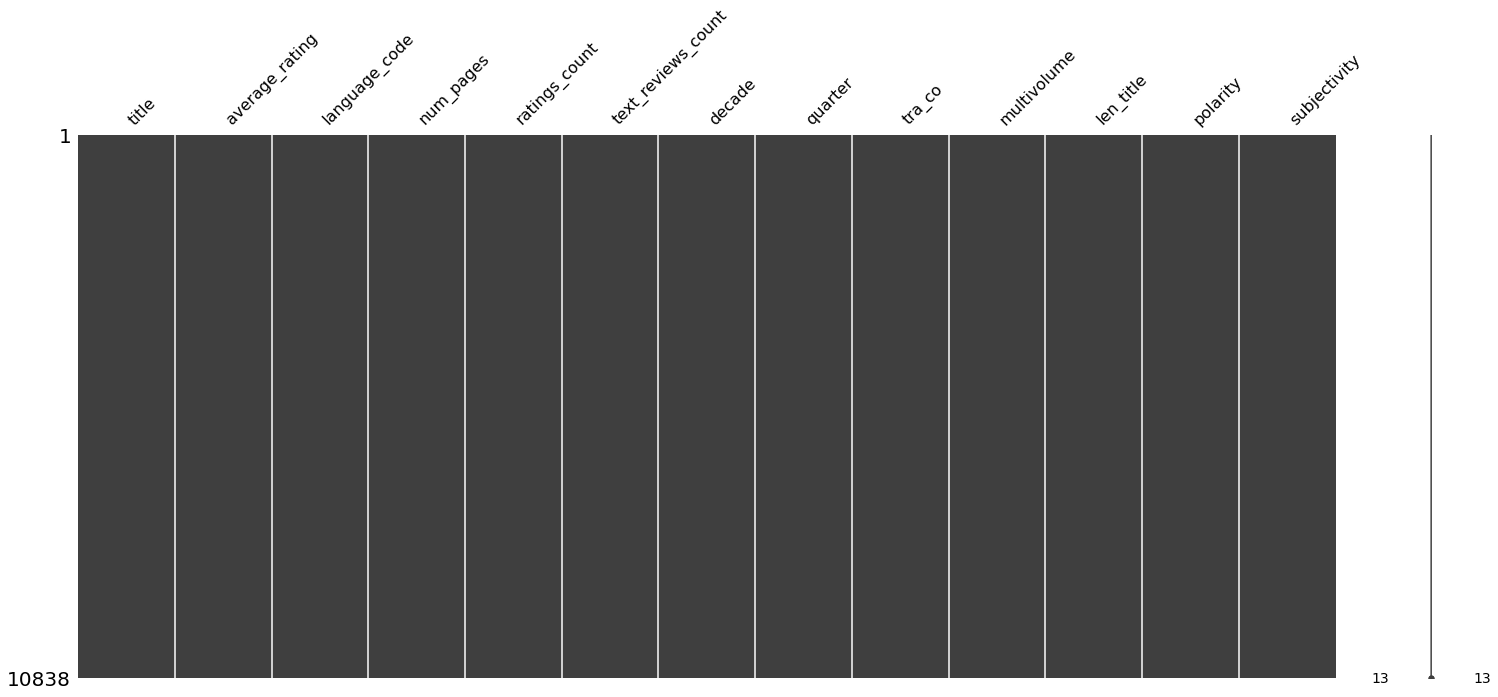

In [42]:
# визуализация пропусков с помощью msno
print(db.isna().sum())
msno.matrix(db)
plt.show()

In [43]:
"""
# приводится для примера
# выделяем пропуски, смотрим их описание, визуализируем

print(db.isna().sum())
msno.matrix(db)
plt.show()
missing = db[db['average_rating'].isna()]
examp = db[~db['average_rating'].isna()]
db_sorted = db.sort_values('average_rating')
msno.matrix(db_sorted)
plt.show()

"""

"\n# приводится для примера\n# выделяем пропуски, смотрим их описание, визуализируем\n\nprint(db.isna().sum())\nmsno.matrix(db)\nplt.show()\nmissing = db[db['average_rating'].isna()]\nexamp = db[~db['average_rating'].isna()]\ndb_sorted = db.sort_values('average_rating')\nmsno.matrix(db_sorted)\nplt.show()\n\n"

In [44]:
# перестроить индекс таблицы по индексу другой таблицы и заполнить пропуски
db8 = db2.reindex(db1.index, method='ffill')

# Работа с текстом

In [45]:
db6 = db.copy()
db6['title'].str.split()

0                     [harry, potter, half, blood, prince]
1                          [harry, potter, order, phoenix]
2                        [harry, potter, chamber, secrets]
3                       [harry, potter, prisoner, azkaban]
4                    [harry, potter, boxed, set, books, 5]
                               ...                        
10833    [expelled, eden, a, william, t, vollmann, reader]
10834                         [you, bright, risen, angels]
10835                                    [the, ice, shirt]
10836                                       [poor, people]
10837                        [las, aventuras, tom, sawyer]
Name: title, Length: 10838, dtype: object

In [46]:
# количество вхождений набора букв love
db6['title'].str.contains('love').sum()

211

In [47]:
# функция для удаления пунктуации
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [48]:
"""
# приводится для примера
# удаляем все имена кроме первого

db['authors'] = db['authors'].str.split(',').str[0]

"""

"\n# приводится для примера\n# удаляем все имена кроме первого\n\ndb['authors'] = db['authors'].str.split(',').str[0]\n\n"

In [49]:
"""

# приводится для примера
# способ подсчета частоты слов с помощью метрики tf-idf и ДО стемминга

count_vectorizer = CountVectorizer()
count_vectorizer.fit(data['text'])
dictionary = count_vectorizer.vocabulary_.items() 
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

"""

"\n\n# приводится для примера\n# способ подсчета частоты слов с помощью метрики tf-idf и ДО стемминга\n\ncount_vectorizer = CountVectorizer()\ncount_vectorizer.fit(data['text'])\ndictionary = count_vectorizer.vocabulary_.items() \nvocab = []\ncount = []\nfor key, value in dictionary:\n    vocab.append(key)\n    count.append(value)\nvocab_bef_stem = pd.Series(count, index=vocab)\nvocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)\ntop_vacab = vocab_bef_stem.head(20)\ntop_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))\n\n"

In [50]:
"""

# приводится для примера
# способ подсчета частоты слов с помощью метрики tf-idf и ПОСЛЕ стемминга

stemmer = SnowballStemmer("english")

def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
data['text'] = data['text'].apply(stemming)
data.head(10)

tfid_vectorizer = TfidfVectorizer("english")

tfid_vectorizer.fit(data['text'])

dictionary = tfid_vectorizer.vocabulary_.items()  

vocab = []
count = []

for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_after_stem = pd.Series(count, index=vocab)

vocab_after_stem = vocab_after_stem.sort_values(ascending=False)

top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

"""

'\n\n# приводится для примера\n# способ подсчета частоты слов с помощью метрики tf-idf и ПОСЛЕ стемминга\n\nstemmer = SnowballStemmer("english")\n\ndef stemming(text):    \n    text = [stemmer.stem(word) for word in text.split()]\n    return " ".join(text) \ndata[\'text\'] = data[\'text\'].apply(stemming)\ndata.head(10)\n\ntfid_vectorizer = TfidfVectorizer("english")\n\ntfid_vectorizer.fit(data[\'text\'])\n\ndictionary = tfid_vectorizer.vocabulary_.items()  \n\nvocab = []\ncount = []\n\nfor key, value in dictionary:\n    vocab.append(key)\n    count.append(value)\n\nvocab_after_stem = pd.Series(count, index=vocab)\n\nvocab_after_stem = vocab_after_stem.sort_values(ascending=False)\n\ntop_vacab = vocab_after_stem.head(20)\ntop_vacab.plot(kind = \'barh\', figsize=(5,10), xlim= (15120, 15145))\n\n'

In [51]:
# смотрю количество символов в названии книг
db['title'].str.len().sort_values(ascending=False)[:5] 

7242    226
826     184
4555    182
2711    170
9527    164
Name: title, dtype: int64

In [52]:
"""

# приводится для примера

! pip install fuzzywuzzy

from fuzzywuzzy import process

# проверяем редакторскую длину, 
# чтобы определить ошибочные написания слова
unique_types = db['title'].unique()
print(process.extract('horry', unique_types, limit = len(unique_types)))

"""

"\n\n# приводится для примера\n\n! pip install fuzzywuzzy\n\nfrom fuzzywuzzy import process\n\n# проверяем редакторскую длину, \n# чтобы определить ошибочные написания слова\nunique_types = db['title'].unique()\nprint(process.extract('horry', unique_types, limit = len(unique_types)))\n\n"

In [53]:
"""
# приводится для примера
# поиск по тексту файла

with open('alice.txt') as file:
  text = file.read()
n = 0
for word in text.split():
  if word.lower() in ['cat', 'cats']:
    n += 1
 print('Lewis Carroll uses the word "cat" {} times'.format(n))

"""

'\n# приводится для примера\n# поиск по тексту файла\n\nwith open(\'alice.txt\') as file:\n  text = file.read()\nn = 0\nfor word in text.split():\n  if word.lower() in [\'cat\', \'cats\']:\n    n += 1\n print(\'Lewis Carroll uses the word "cat" {} times\'.format(n))\n\n'

In [54]:
"""
# приводится для примера
# убрать лишние символы из строк в ячейках

chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['title']
for col in cols_to_clean:
        for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
         apps[col] = pd.to_numeric(int)

"""

"\n# приводится для примера\n# убрать лишние символы из строк в ячейках\n\nchars_to_remove = ['+', ',', 'M', '$']\ncols_to_clean = ['title']\nfor col in cols_to_clean:\n        for char in chars_to_remove:\n        apps[col] = apps[col].str.replace(char, '')\n         apps[col] = pd.to_numeric(int)\n\n"

# Работа с датами

In [55]:
db6 = pd.read_csv(os.getcwd() + '\\books.csv', 
                error_bad_lines=False, parse_dates=['publication_date'])
db6['publication_date'] = pd.to_datetime(db6['publication_date'], format='%m/%d/%Y', errors='coerce')
db6 = db6.set_index(pd.DatetimeIndex(db6['publication_date']))

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [56]:
# группировка данных по заданным интервалам дат
db6.resample('Y').sum().head(3)

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
publication_date,,,,,,
1900-12-31,37134,3.88,9780753812938,144,332,33
1901-12-31,0,0.00,0,0,0,0
1902-12-31,0,0.00,0,0,0,0


In [57]:
# проходим по нужному периоду времени и считаем статистики
db6 = pd.read_csv(os.getcwd() + '\\books.csv', error_bad_lines=False, parse_dates=['publication_date'])
db6['publication_date'] = pd.to_datetime(db6['publication_date'], format='%m/%d/%Y', errors='coerce')
db6 = db6.set_index(pd.DatetimeIndex(db6['publication_date']))

db10 = db6['average_rating'].resample('6h').mean()
db11 = db6['average_rating'].resample('D').count()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


# Объединение таблиц

In [58]:
db4 = db.copy()
db4.head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000


In [59]:
# разделяю на две таблицы, чтобы соединить
db4 = db.copy()
db4_1 = db4.loc[0:3, ['title', 'average_rating', 'language_code']] 
db4_2 = db4.loc[4:6, ['title', 'average_rating', 'language_code']]

# соединяю по строкам
pd.concat([db4_1, db4_2], ignore_index=True)

,title,average_rating,language_code
0,harry potter half blood prince,4.57,eng
1,harry potter order phoenix,4.49,eng
2,harry potter chamber secrets,4.42,eng
3,harry potter prisoner azkaban,4.56,eng
4,harry potter boxed set books 5,4.78,eng
5,unauthorized harry potter book seven news half...,3.74,en-US
6,harry potter collection,4.73,eng


In [60]:
# объединяю по столбцам
pd.concat([db4_1, db4_2], axis="columns") 

,title,average_rating,language_code,title,average_rating,language_code
0,harry potter half blood prince,4.57,eng,NaN,NaN,NaN
1,harry potter order phoenix,4.49,eng,NaN,NaN,NaN
2,harry potter chamber secrets,4.42,eng,NaN,NaN,NaN
3,harry potter prisoner azkaban,4.56,eng,NaN,NaN,NaN
4,NaN,NaN,NaN,harry potter boxed set books 5,4.78,eng
5,NaN,NaN,NaN,unauthorized harry potter book seven news half...,3.74,en-US
6,NaN,NaN,NaN,harry potter collection,4.73,eng


Почему здесь возникает NaN? Потому что в первой таблице нет значение 4, 5, 6, а во второй нет значений 0, 1, 2, 3. В этом случае я как бы сбоку подставляю к одной таблице другую.

In [61]:
db4 = db.copy()
db4_1 = db4.loc[0:3, ['title', 'average_rating', 'language_code']] 
db4_2 = db4.loc[4:6, ['title', 'num_pages', 'language_code']]

# соединяем по строкам только по совпадающим столбцам
pd.concat([db4_1, db4_2], join='inner')

,title,language_code
0,harry potter half blood prince,eng
1,harry potter order phoenix,eng
2,harry potter chamber secrets,eng
3,harry potter prisoner azkaban,eng
4,harry potter boxed set books 5,eng
5,unauthorized harry potter book seven news half...,en-US
6,harry potter collection,eng


In [62]:
db4 = db.copy()
db4_1 = db4.loc[0:3, ['title', 'average_rating']] 
db4_2 = db4.loc[0:6, ['title', 'language_code']]

# правое объединение
db4_1.merge(db4_2, how="right")

,title,average_rating,language_code
0,harry potter half blood prince,4.57,eng
1,harry potter order phoenix,4.49,eng
2,harry potter chamber secrets,4.42,eng
3,harry potter prisoner azkaban,4.56,eng
4,harry potter boxed set books 5,NaN,eng
5,unauthorized harry potter book seven news half...,NaN,en-US
6,harry potter collection,NaN,eng


Здесь использую стобцы из правой таблицы для объединения с левой. Ниже наоборот.

In [63]:
db4 = db.copy()
db4_1 = db4.loc[0:3, ['title', 'average_rating']] 
db4_2 = db4.loc[0:6, ['title', 'language_code']]

# левое объединение
db4_1.merge(db4_2, how="left")

,title,average_rating,language_code
0,harry potter half blood prince,4.57,eng
1,harry potter order phoenix,4.49,eng
2,harry potter chamber secrets,4.42,eng
3,harry potter prisoner azkaban,4.56,eng


# Сортировка. Группировка

In [64]:
# сортировка по двум значениям
# сначала сортировка идет по первому значению
# а затем, внутри первого, по второму
db.sort_values(by=["average_rating", "text_reviews_count"], ascending=False).head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
4680,the diamond color meditation color pathway soul,5.0,eng,74,5,3,2000,1,0,0,55,0.000000,0.000000
839,literature circle guide bridge terabithia ever...,5.0,eng,32,4,1,2000,1,0,0,163,0.675000,0.950000
6056,the new big book america,5.0,eng,56,2,1,2000,1,1,0,27,0.068182,0.277273


In [65]:
# группируем, а затем получаю статистики по каждому признаку

db5 = db.groupby("language_code").aggregate(['min', np.median, 'max'])
db5.head(3)

average_rating              num_pages             ratings_count  \
                         min median   max       min median  max           min   
language_code                                                                   
ale                     4.36   4.36  4.36       512  512.0  512           102   
ara                     3.55   3.55  3.55       349  349.0  349           122   
en-CA                   3.66   4.05  4.21       160  246.0  388          1024   

                            text_reviews_count  ...      len_title             \
               median   max                min  ...  max       min median max   
language_code                                   ...                             
ale             102.0   102                 16  ...   16        18     18  18   
ara             122.0   122                 12  ...   12         4      4   4   
en-CA          4513.0  6256                102  ...  515         8     31  51   

              polarity             subjectivity               
                   min median  max          min median   max  
language_code                                                 
ale                0.0    0.0  0.0          0.0    0.0  0.00  
ara                0.0    0.0  0.0          0.0    0.0  0.00  
en-CA             -0.5    0.0  0.0          0.0    0.3  0.55  

[3 rows x 21 columns]

In [66]:
# применеяю pivot table

db2 = db.copy()
db2["example"] = db2["language_code"].apply(lambda x: "English" if "eng" in x else "other")
db2.pivot_table("num_pages", index='language_code', columns='example').head(5)

example,English,other
language_code,,
ale,NaN,512.000000
ara,NaN,349.000000
en-CA,NaN,252.000000
en-GB,NaN,322.976077
en-US,NaN,338.742899


Pivot table очень популярный инструмент. В принципе это своего рода группировка с подсчетом метрик по группам. Что здесь происходит? Я указываю метрику, которую хочу подсчитать (**num_pages**). Я хочу ее подсчитать по каким-то группам. Чтобы определить эти группы, я задаю два параметра: индекс или строки (**language_code**) и столбцы (**example**). Пересечение параметров, то есть ячейки, это и есть искомые группы, для каждой из которых подсчитывается метрика.

In [67]:
# разбиваю данные на интервалы
interval = pd.cut(db['len_title'], [10, 30, 100])
interval

0        (30, 100]
1        (30, 100]
2        (30, 100]
3        (30, 100]
4        (30, 100]
           ...    
10833    (30, 100]
10834     (10, 30]
10835     (10, 30]
10836     (10, 30]
10837     (10, 30]
Name: len_title, Length: 10838, dtype: category
Categories (2, interval[int64]): [(10, 30] < (30, 100]]

In [68]:
# применяю pivot table с учетом интервалов
db2.pivot_table('num_pages', index=['language_code', interval], columns='example').head(5)

example                  English       other
language_code len_title                     
ale           (10, 30]       NaN  512.000000
en-CA         (10, 30]       NaN  203.000000
              (30, 100]      NaN  242.500000
en-GB         (10, 30]       NaN  320.469027
              (30, 100]      NaN  328.486842

In [69]:
# разбиение на интервалы по квантилям
inter_quant = pd.cut(db['num_pages'], 2)

In [70]:
# применение pivot table 
# с получением метрик по нескольким признакам
db2.pivot_table(index='language_code', columns='example', 
                aggfunc={'average_rating': 'mean', "num_pages": sum}).head(5)

average_rating           num_pages          
example              English     other   English     other
language_code                                             
ale                      NaN  4.360000       NaN     512.0
ara                      NaN  3.550000       NaN     349.0
en-CA                    NaN  4.025714       NaN    1764.0
en-GB                    NaN  3.916029       NaN   67502.0
en-US                    NaN  3.910736       NaN  465094.0

<AxesSubplot:xlabel='language_code'>

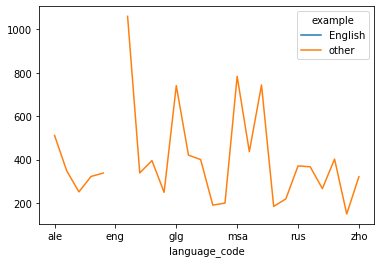

In [71]:
# применение pivot table с построением графика
db2.pivot_table('num_pages', index='language_code', columns='example', aggfunc='mean').plot() 

In [72]:
# ранжирую от наименьшего до наибольшего
db[['num_pages']].rank().head(3)

,num_pages
0,9996.5
1,10507.0
2,6703.5


In [73]:
"""
# приводится для примера
# группировка одной таблицы по столбцам другой таблицы

life_by_region = db2.groupby(db6['tra_co'])
print(life_by_region['2010'].mean())

"""

"\n# приводится для примера\n# группировка одной таблицы по столбцам другой таблицы\n\nlife_by_region = db2.groupby(db6['tra_co'])\nprint(life_by_region['2010'].mean())\n\n"

# Разное

In [74]:
# функция итерации по словарю
def report_status(**kwargs):
    print("\nBEGIN: REPORT\n")
    for key, value in kwargs.items():
        print(key + ": " + value)
    print("\nEND REPORT")

In [75]:
"""

# приводится для примера
# среднее по всем колонкам

db.apply(np.mean, axis=0)


# среднее по всем строкам

db.apply(np.mean, axis=1)

"""

'\n\n# приводится для примера\n# среднее по всем колонкам\n\ndb.apply(np.mean, axis=0)\n\n\n# среднее по всем строкам\n\ndb.apply(np.mean, axis=1)\n\n'

<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

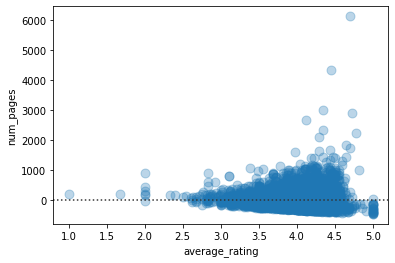

In [76]:
# разброс остатков
sns.residplot(x='average_rating', y='num_pages', data=db, scatter_kws={'s':80, 'alpha': 0.3}) 

# Различные типы графиков

Text(0.5, 1.0, 'Отношение оценок к количеству страниц')

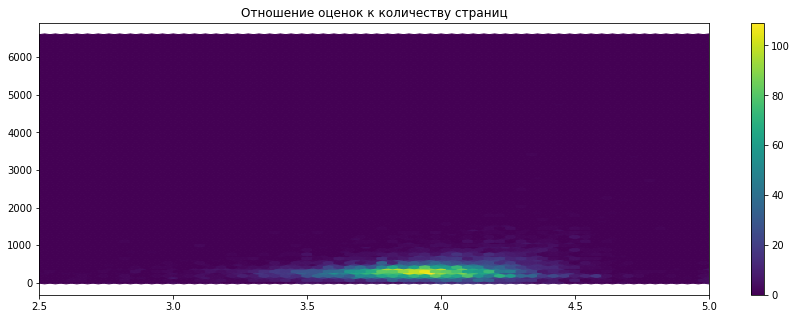

In [77]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.hexbin(db['average_rating'], db['num_pages'])
plt.colorbar()
plt.xlim(2.5, 5.0) 
plt.title('Отношение оценок к количеству страниц')

In [78]:
# получа. значения гистограммы без постройки
counts, bin_edges = np.histogram(db['average_rating'], bins=5) 
counts

array([   2,   10,  419, 8463, 1944], dtype=int64)

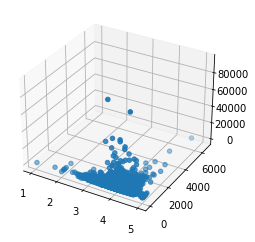

In [79]:
# 3-d график
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(db['average_rating'], db['num_pages'], db['text_reviews_count'])

example  English  other
tra_co                 
0           5232   1260
1           3437    909


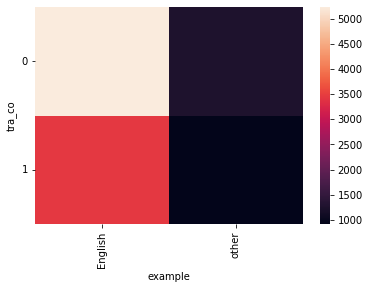

In [80]:
# делаю карту
pd_crosstab = pd.crosstab(db2["tra_co"], db2["example"])
print(pd_crosstab)
sns.heatmap(pd_crosstab)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

C:\Users\runaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


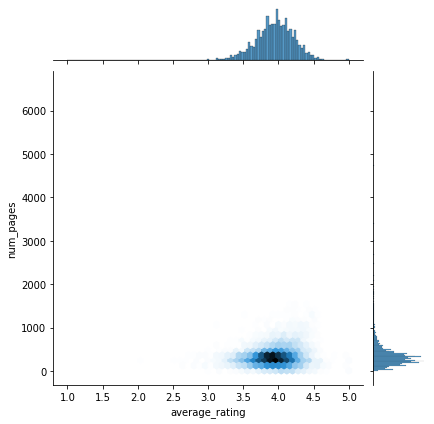

In [81]:
sns.jointplot(db['average_rating'], db['num_pages'], kind='hex')

<AxesSubplot:xlabel='example', ylabel='average_rating'>

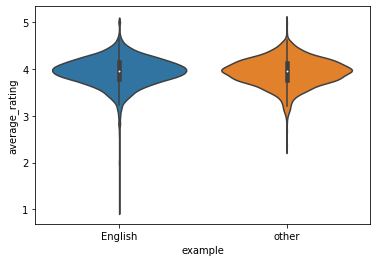

In [82]:
# скрипичные графики это гистограммы, но сразу с оценкой плотности
sns.violinplot(x='example', y = 'average_rating', data=db2) 

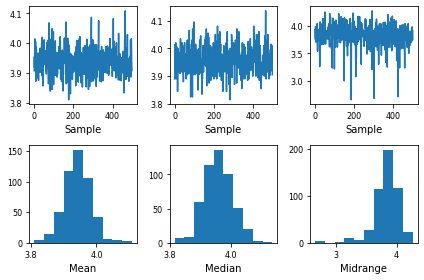

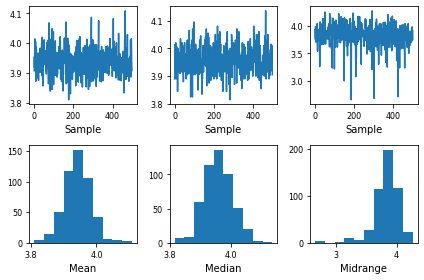

In [83]:
pd.plotting.bootstrap_plot(db['average_rating'])

Text(0.5, 1.0, 'Зависимость средней оценки от квартала')

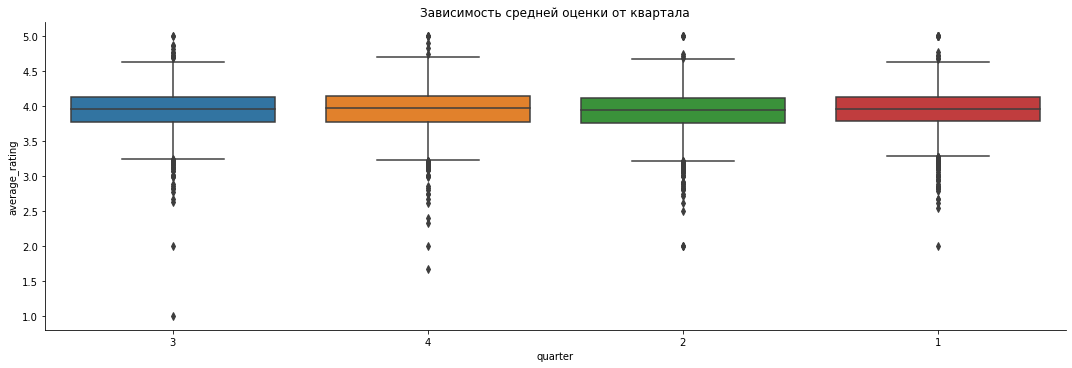

In [84]:
sns.catplot(kind='box', x='quarter', y='average_rating', data=db, aspect=3)
plt.title('Зависимость средней оценки от квартала')

In [85]:
db.head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000


<AxesSubplot:xlabel='average_rating', ylabel='ratings_count'>

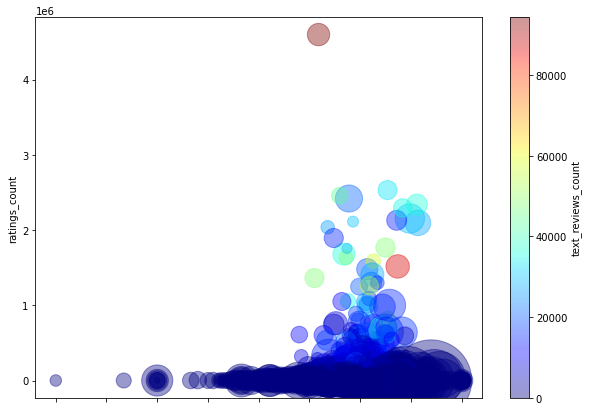

In [86]:
db.plot(kind='scatter', x='average_rating', y='ratings_count', alpha=0.4, s=db['num_pages'], figsize=(10, 7), c='text_reviews_count', cmap=plt.get_cmap('jet'), colorbar=True)

<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

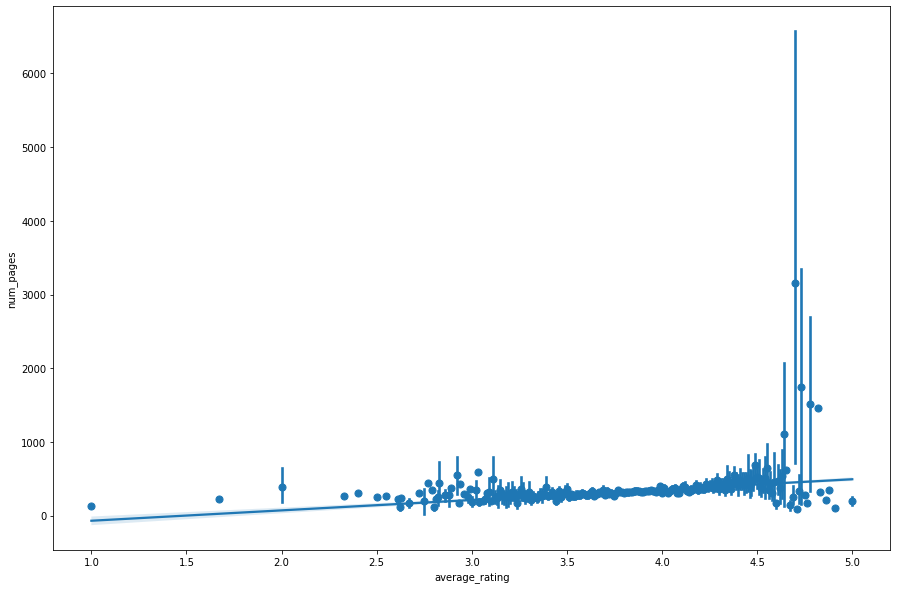

In [87]:
# если на значении из x лежит несколько значений y, 
# то они усредняются
fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='average_rating', y='num_pages', data=db, x_estimator=np.mean) 

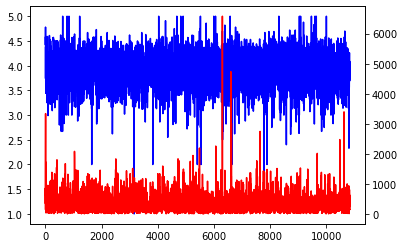

In [88]:
# если столбцы заданы в сильно отличающихся шкалах, 
# то можно построить две оси y на одном графике
fig, ax = plt.subplots()
ax.plot(db.index, db2['average_rating'], color='blue')
ax2 = ax.twinx()
ax2.plot(db.index, db2['num_pages'], color='red')
plt.show()

In [89]:
# функция для построения графиков
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  axes.plot(x, y, color=color)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)
  axes.tick_params('y', colors=color)

In [90]:
"""
# приводится для примера  
# построение графиков циклом

fig, ax = plt.subplots()
for x in data:
  graf_df = db2[db2['example'] == x]
  ax.bar(x, graf_df['average_rating'].mean(), yerr=graf_df['average_rating'].std())
ax.set_ylabel("average_rating")
ax.set_xticklabels(x, rotation=90)

"""

'\n# приводится для примера  \n# построение графиков циклом\n\nfig, ax = plt.subplots()\nfor x in data:\n  graf_df = db2[db2[\'example\'] == x]\n  ax.bar(x, graf_df[\'average_rating\'].mean(), yerr=graf_df[\'average_rating\'].std())\nax.set_ylabel("average_rating")\nax.set_xticklabels(x, rotation=90)\n\n'

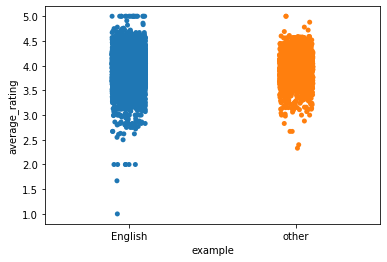

In [91]:
# стрипплоты, линейный плот
sns.stripplot(data=db2,
         x='example',
         y='average_rating',
         jitter=True)
plt.show()

# Построение нескольких графиков

Как правило, построить несколько графиков на одной подложке можно, если:

1) в одном вызове объединить несколько графиков; 
2) в одном графике указать два и более столбцов; 
3) воспользоваться внутренними параметрами самих графиков. 

(array([5.46e+03, 3.44e+02, 2.40e+01, 4.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([  11. ,  667.5, 1324. , 1980.5, 2637. , 3293.5, 3950. , 4606.5,
        5263. , 5919.5, 6576. ]),
 [<matplotlib.patches.Polygon at 0x2031dda6d30>])

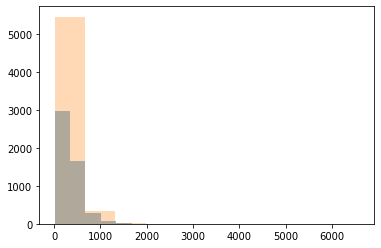

In [92]:
# две гистограммы на одном рисунке
av_rat_1 = db.iloc[1:5000, 3]
av_rat_2 = db.iloc[5001:11000, 3]
plt.hist(av_rat_1, alpha=0.5, histtype='stepfilled')
plt.hist(av_rat_2, alpha=0.3, histtype='stepfilled') 

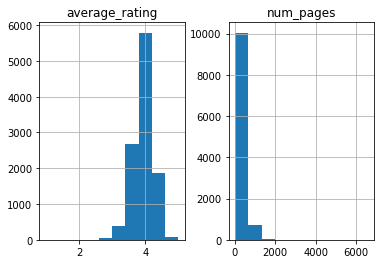

In [93]:
# несколько гистограмм отдельно на одной фигуре
cols = ['average_rating', 'num_pages']
db2[cols].hist()
plt.show()

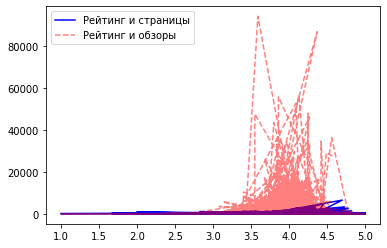

In [94]:
# два графика на одном рисунке
fig, ax = plt.subplots()
ax.plot(db['average_rating'], db['num_pages'], '-b', label='Рейтинг и страницы')
ax.plot(db['average_rating'], db['text_reviews_count'], '--r', label='Рейтинг и обзоры', alpha=0.5)
leg = ax.legend() 

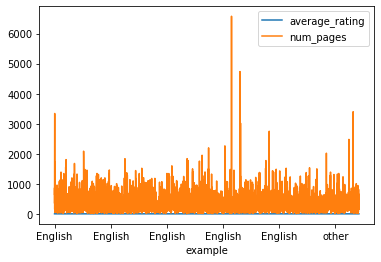

In [95]:
# построение по нескольким столбцам
y_columns = ['average_rating', 'num_pages']
db2.plot(x='example', y=y_columns)
plt.show()

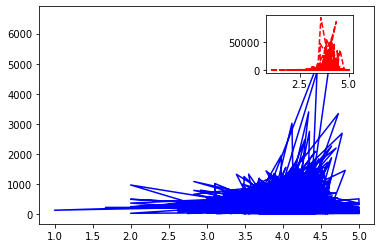

In [96]:
# график в графике
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax1.plot(db['average_rating'], db['num_pages'], '-b', label='Рейтинг и страницы')
ax2.plot(db['average_rating'], db['text_reviews_count'], '--r', label='Рейтинг и обзоры') 

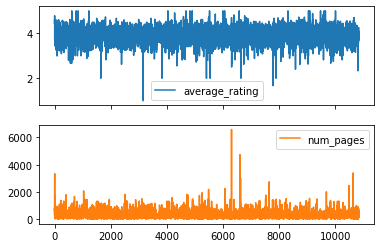

In [97]:
# два отдельных графика, если единицы не соизмеримы у двух столбцов
cols = ['average_rating', 'num_pages']
db2[cols].plot(subplots=True)
plt.show()

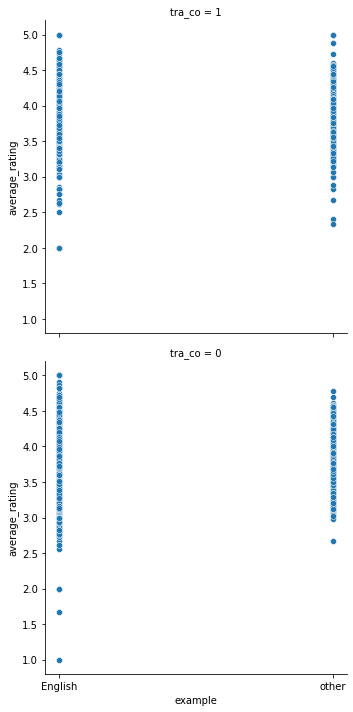

In [98]:
# создание сабплотов по трем признакам: 
# два на графике, каждый график сгруппирован по третьему признаку
sns.relplot(x="example", y="average_rating", 
            data=db2,
            kind="scatter", 
            row="tra_co")
plt.show()

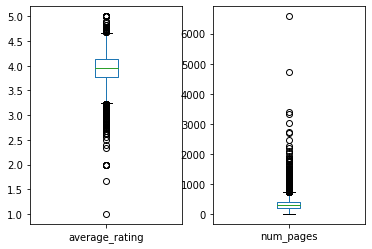

In [99]:
# или боксплота два
cols = ['average_rating', 'num_pages']
db2[cols].plot(kind='box', subplots=True)
plt.show()

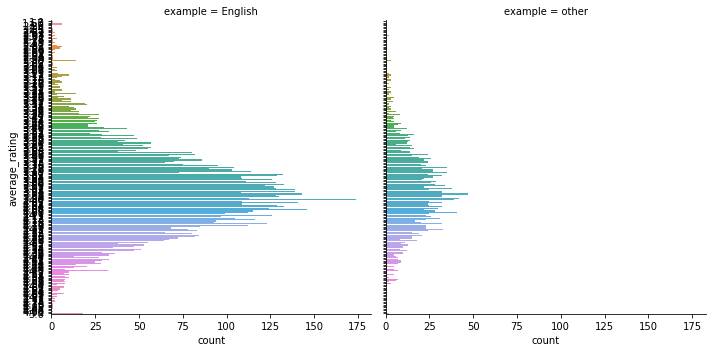

In [100]:
# сабплоты по категории из третьего признака
sns.catplot(y="average_rating", col='example', data=db2,
            kind="count")
plt.show()

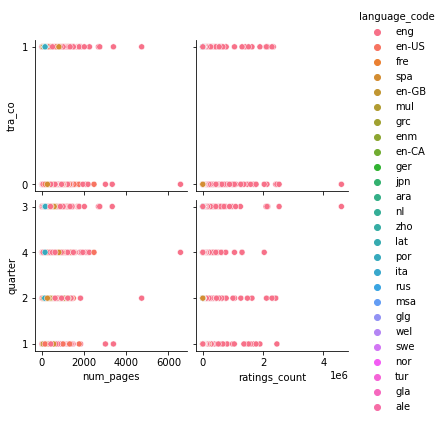

<Figure size 432x288 with 0 Axes>

In [101]:
# в рядах можно поставить различные признаки
sns.pairplot(data=db2,
        x_vars=["num_pages", "ratings_count"],
        y_vars=['tra_co', 'quarter'],
        kind='scatter',
        hue='language_code',
        palette='husl')
plt.show()
plt.clf()

In [102]:
"""

# приводится для примера
# добавляем логарифмическую шкалу

plt.xscale('log')

# изменяем подписи на оси x
plt.xticks(tick_val, tick_lab)

# размер точки на графике
plt.scatter(gdp_cap, life_exp, s = np_pop)

# меняю цвет и прозрачность точек
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)
 
# подписываю отдельные точки

plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

# ограничиваю значения по шкалам 

plt.xlim(20, 55)
plt.ylim(20, 55)

# параметр графика, который определяет цвет подписей, сетки и т.п.

axes.tick_params('y', colors=color)

# поворот подписей

plt.xticks(rotation=90)

"""

"\n\n# приводится для примера\n# добавляем логарифмическую шкалу\n\nplt.xscale('log')\n\n# изменяем подписи на оси x\nplt.xticks(tick_val, tick_lab)\n\n# размер точки на графике\nplt.scatter(gdp_cap, life_exp, s = np_pop)\n\n# меняю цвет и прозрачность точек\nplt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)\n \n# подписываю отдельные точки\n\nplt.text(1550, 71, 'India')\nplt.text(5700, 80, 'China')\n\n# ограничиваю значения по шкалам \n\nplt.xlim(20, 55)\nplt.ylim(20, 55)\n\n# параметр графика, который определяет цвет подписей, сетки и т.п.\n\naxes.tick_params('y', colors=color)\n\n# поворот подписей\n\nplt.xticks(rotation=90)\n\n"

# Построение отдельных элементов графиков

Text(0, 0.5, 'оценка')

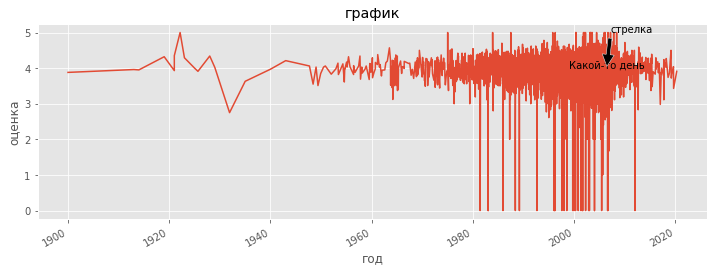

In [103]:
# надпись и стрекла на графике
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 4))
db6['average_rating'].plot(ax=ax)
ax.text('2006-05-28', 4, 'Какой-то день', ha='center') 
ax.annotate('стрелка', xy=('2006-05-28', 4), xytext=('2007-02-27', 5), arrowprops=dict(facecolor='black', shrink=0.05)) 
plt.title('график')
plt.xlabel('год')
plt.ylabel('оценка') 

In [104]:
"""
# приводится для примера
# полосы на графике

plt.fill_between(train_sizes, train_mean - train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

"""

"\n# приводится для примера\n# полосы на графике\n\nplt.fill_between(train_sizes, train_mean - train_std, train_mean+train_std, color='#DDDDDD')\nplt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')\n\n"

<AxesSubplot:xlabel='num_pages', ylabel='average_rating'>

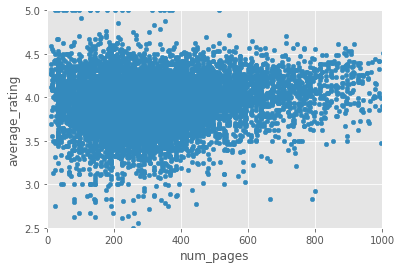

In [105]:
# выбираю для изучения конкретный кусок графика
# увеличиваю график
db.plot.scatter(x='num_pages', y='average_rating', xlim=[0, 1000], ylim=[2.5, 5]) 

# Графики временных рядов

<AxesSubplot:xlabel='publication_date'>

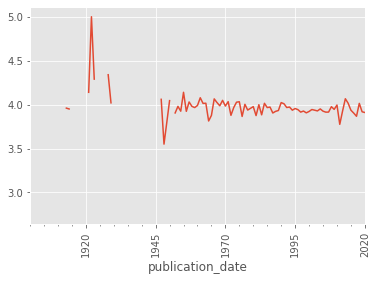

In [106]:
# среднее на начало года
db6.resample('AS')['average_rating'].mean().plot(rot=90) 

<AxesSubplot:xlabel='publication_date'>

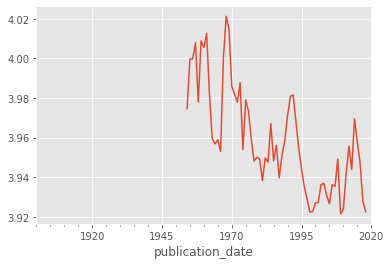

In [107]:
# беру среднее за год. Затем делаю скользящее окно в 10 лет 
# и беру среднее уже за этот период
db6.resample('AS')['average_rating'].mean().rolling(5, center=True).mean().plot() 

<AxesSubplot:xlabel='publication_date'>

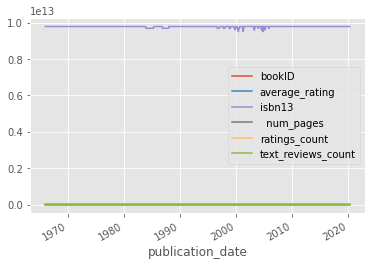

In [108]:
# данные в интервале окна
db6.sort_index().rolling(window=100).mean().plot() 

In [109]:
"""
# приводится для примера
# измеряю среднее значение выборки, то есть периода заданного окном
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
db[['average_rating', 'num_pages']].rolling(window=100, center=True).apply(mean_abs_dev).plot()

"""

"\n# приводится для примера\n# измеряю среднее значение выборки, то есть периода заданного окном\nmean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()\ndb[['average_rating', 'num_pages']].rolling(window=100, center=True).apply(mean_abs_dev).plot()\n\n"

C:\Users\runaz\anaconda3\lib\site-packages\pandas\core\frame.py:5582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(
C:\Users\runaz\AppData\Local\Temp/ipykernel_78260/4040919132.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = data['1950-01':'2010-06'].resample('1Y').sum()


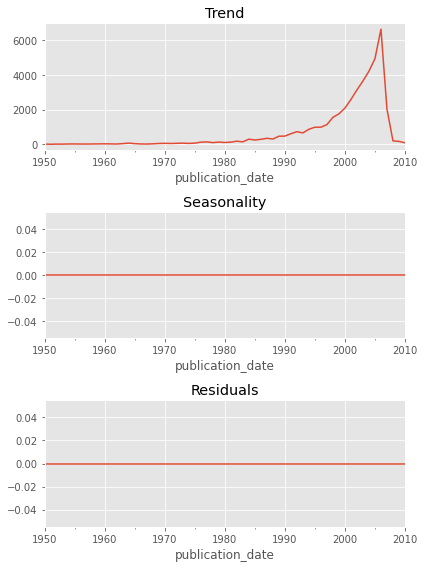

In [110]:
# разбиваю на тренд, сезонность и необъясненный остаток
data = db6[['average_rating']]
data.sort_index(inplace=True)
data = data['1950-01':'2010-06'].resample('1Y').sum()
decomposed =seasonal_decompose(data)
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

# Особенности seaborn

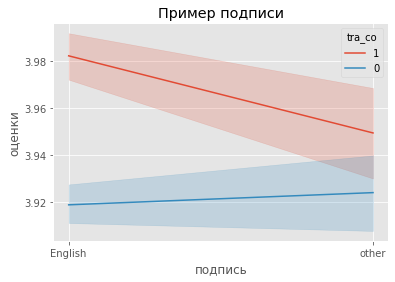

In [111]:
# подпись осей в seaborn
g = sns.lineplot(y="average_rating", x='example', 
                 data=db2,
                 hue="tra_co")
g.set(xlabel='подпись', ylabel='оценки')
g.set_title('Пример подписи')
plt.show()

C:\Users\runaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


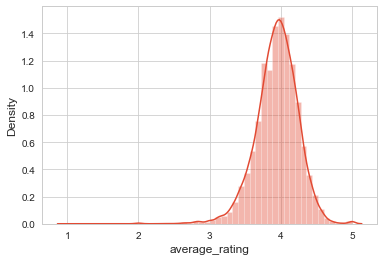

<Figure size 432x288 with 0 Axes>

In [112]:
# изменение стиля в seaborn
sns.set_style('whitegrid')
sns.distplot(db['average_rating'])
plt.show()
plt.clf()


C:\Users\runaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


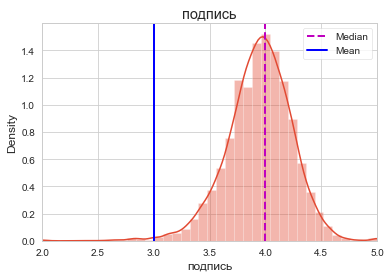

In [113]:
# рисую дополнительные линии,
# ограничиваю оси
fig, ax = plt.subplots()
sns.distplot(db['average_rating'], ax=ax)
ax.set(xlabel="подпись", xlim=(2,5), title="подпись")
ax.axvline(x=4.0, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=3.0, color='b', label='Mean', linestyle='-', linewidth=2)
ax.legend()
plt.show()

<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

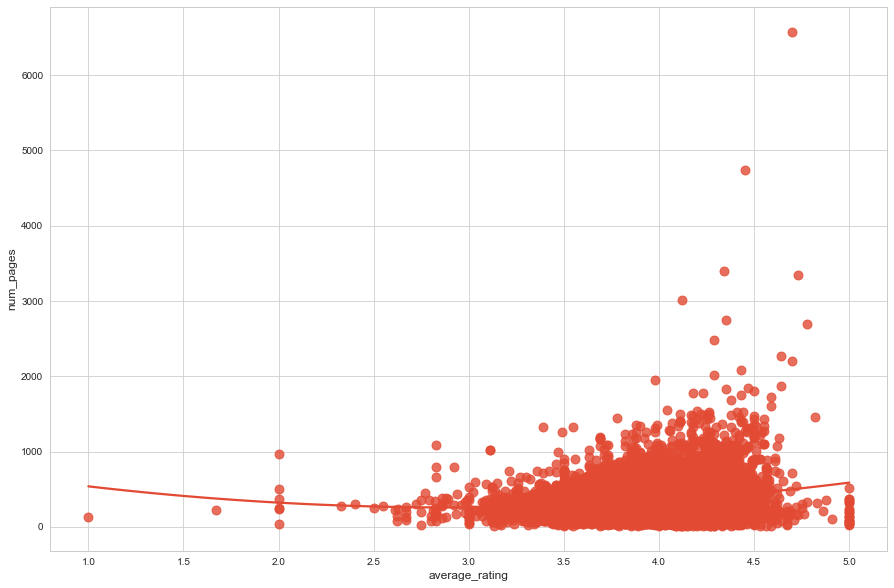

In [114]:
# изменение размера точек
# отключение доверительного интервала
# полиномиальная регрессия
fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='average_rating', y='num_pages', data = db, ci=None, scatter_kws={'s':80}, order=2) 

# Работа с векторами, матрицами

In [115]:
# вектор, построенный на значениях от 0 до 17
np.array(list(range(18)))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [116]:
# нулевой вектор
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [117]:
# единичная матрица
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [118]:
# матрица размерности в 3 строки
# и 5 столбцов 
# пересечения заполнены восьмерками
np.full((3, 5), 8)

array([[8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8]])

In [119]:
# вектор из значений от 0 до 40
# с шагом в 4
np.arange(0, 40, 4)

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36])

In [120]:
# вектор с 4 значениями, 
# отобранными из равномерного распределения
# в интервале от 0 до 8
np.linspace(0, 8, 4)

array([0.        , 2.66666667, 5.33333333, 8.        ])

In [121]:
# вектор с 8 значениями
# из интервала от 0 до 1
# 1 не входит
np.random.random(8)

array([0.36594294, 0.47028606, 0.52917023, 0.336504  , 0.15501462,
       0.66561937, 0.93283112, 0.5966892 ])

In [122]:
# вектор из нормального распределения
# со средним 1 и стандартным отклонением 2
# всего 3 числа
np.random.normal(1, 2, 3)

array([ 3.16674533e+00, -2.65522815e-03, -3.38401789e+00])

In [123]:
# вектор целых случайных чисел
# от 0 до 10
# всего 5 значений
np.random.randint(0, 10, 5)

array([7, 4, 9, 0, 1])

In [124]:
# преобразую вектор в матрицу
np.arange(1, 10).reshape((3, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [125]:
# вектор с 3 случайными значениями
# в интервале от 0 до 5
np.random.choice(5, 3)

array([3, 0, 2])

# Оценка распределения

C:\Users\runaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_rating', ylabel='Density'>

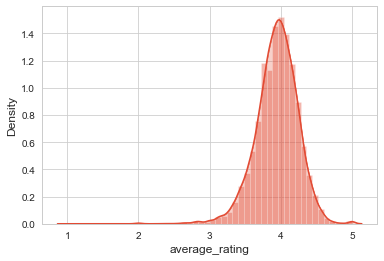

In [126]:
# оценка плотности распределения
sns.kdeplot(db['average_rating'], shade=True) 

# плотность и количество
sns.distplot(db['average_rating'])

C:\Users\runaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

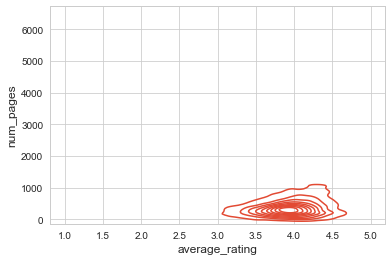

In [127]:
# двумерный график ядерной оценки плотности
sns.kdeplot(db['average_rating'], db['num_pages']) 

C:\Users\runaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


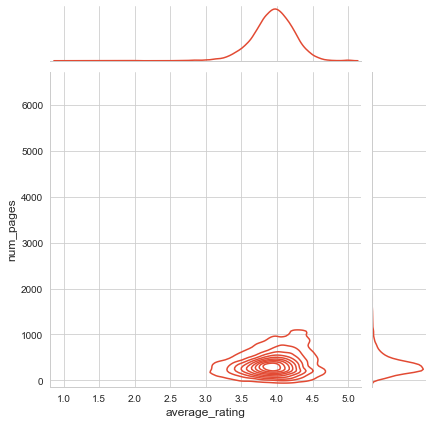

In [128]:
# ядерная оценка плотности плюс гистограммы
sns.jointplot(db['average_rating'], db['num_pages'], kind='kde')

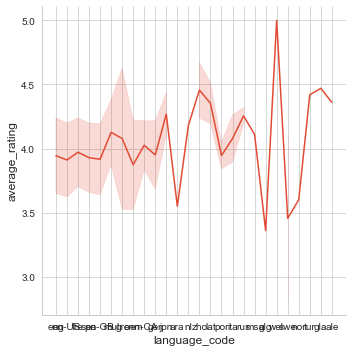

In [129]:
# доверительные интервалы по стандартному отклонению
sns.relplot(x='language_code', y="average_rating",
            data=db2, kind="line", ci='sd')
plt.show()

# Статистические тесты

In [130]:
# перестановочный тест
X = db[db['decade']==2000]['average_rating'] 
y = db[db['decade'] == 1990]['average_rating']
p_value = permutation_test(X, y,
                           method='approximate',
                           num_rounds=10000,
                           seed=0) 

C:\Users\runaz\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\runaz\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [131]:
# t-test на разницу средних между группами
summary, result = rp.ttest(group1 = db2['average_rating'][db2['language_code'] == 'eng'], group1_name='eng', group2 = db2['average_rating'][db2['language_code'] == 'spa'], group2_name='spa')
summary 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,eng,8669.0,3.944010,0.296334,0.003183,3.937771,3.950249
1,spa,217.0,3.928664,0.270650,0.018373,3.892450,3.964877
2,combined,8886.0,3.943635,0.295729,0.003137,3.937485,3.949785


Интепретация состоит в следующем. Разница между книгами на английском и книгами на испанском меньше нуля. Нулевая гипотеза - средние равны. Эта гипотеза отвергается, так как у нее вероятность 0.

Text(4.4, 1.0, '$\\mu =  3.9, \\ sigma =  0.3$')

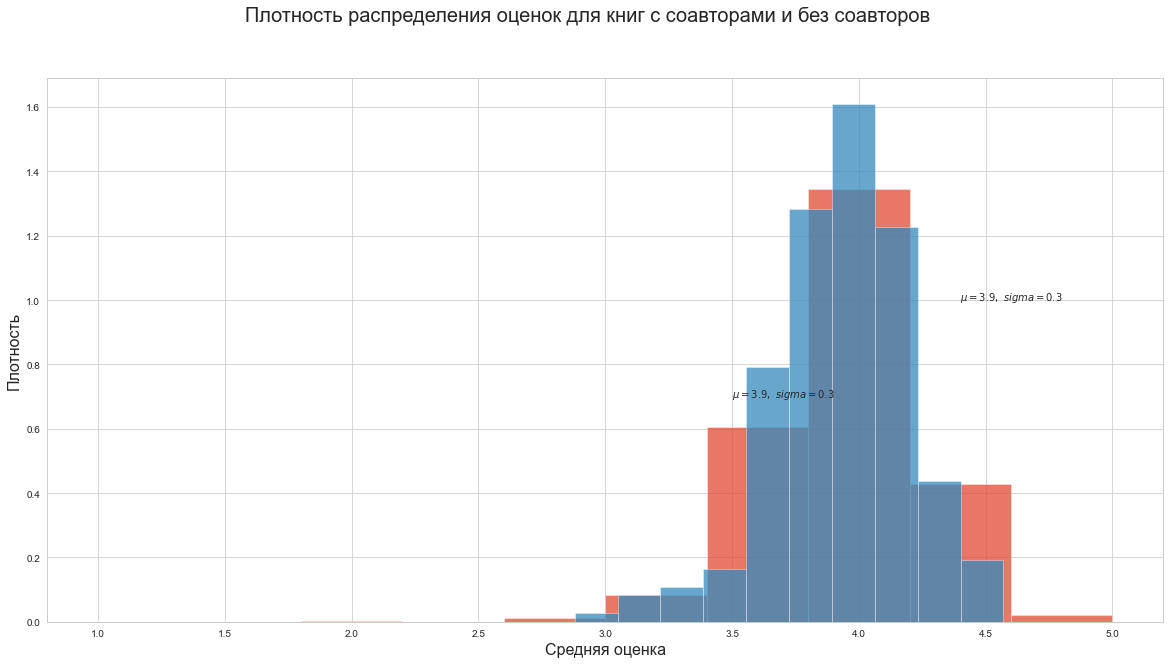

In [132]:
# визуальная проверка равенства средних
fig = plt.figure(figsize=(20, 10)) 
ax = fig.add_subplot(111)

coauthors = plt.hist(db2['average_rating'][db2['language_code'] == 'eng'], label='eng', alpha=0.75, density=True)
not_coauthors = plt.hist(db2['average_rating'][db2['language_code'] == 'spa'], label='spa', alpha=0.75, density=True)

plt.suptitle('Плотность распределения оценок для книг с соавторами и без соавторов', fontsize=20)
plt.xlabel('Средняя оценка', fontsize=16)
plt.ylabel('Плотность', fontsize=16)

plt.text(3.5, 0.7, f"$\mu = {db2['average_rating'][db2['language_code'] == 'eng'].mean(): .1f}, \\ sigma = {db2['average_rating'][db2['language_code'] == 'eng'].std(): .1f}$")
plt.text(4.4, 1.0, f"$\mu = {db2['average_rating'][db2['language_code'] == 'spa'].mean(): .1f}, \\ sigma = {db2['average_rating'][db2['language_code'] == 'spa'].std(): .1f}$")

In [133]:
# применение хи-квадрата
crosstab = pd.crosstab(db['decade'], db['quarter'])
stats(crosstab) 

(72.62802136454216,
 1.324024527542344e-07,
 21,
 array([[   5.20871009,    5.49492526,    5.78723012,    5.50913453],
        [   6.86602694,    7.24331057,    7.62862152,    7.26204097],
        [  17.04668758,   17.98339177,   18.94002584,   18.02989481],
        [  47.35190995,   49.95386603,   52.61118288,   50.08304115],
        [ 144.42332534,  152.35929138,  160.46410777,  152.75327551],
        [ 576.74626315,  608.43808821,  640.80420742,  610.01144123],
        [1735.92101864, 1831.30872855, 1928.7259642 , 1836.04428861],
        [  32.43605831,   34.21839823,   36.03866027,   34.30688319]]))

In [134]:
# еще один вариант хи-квадрата
crosstab, test_results, expected = rp.crosstab(db['decade'], db['quarter'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell") 

# Метрики

In [135]:
# считаю дисперсию
db.var() 

average_rating        8.725347e-02
num_pages             5.690915e+04
ratings_count         1.296547e+10
text_reviews_count    6.756518e+06
len_title             5.261888e+02
polarity              3.749973e-02
subjectivity          7.293274e-02
dtype: float64

In [136]:
# считаю ковариацию
db.cov() 

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
average_rating,0.087253,12.283359,1.393291e+03,2.660359e+01,0.730491,0.001165,0.001418
num_pages,12.283359,56909.146836,8.170480e+05,1.934607e+04,125.863033,-1.167482,-2.217905
ratings_count,1393.291040,817048.023258,1.296547e+10,2.565132e+08,-153127.335024,-419.684921,-527.103347
text_reviews_count,26.603589,19346.070598,2.565132e+08,6.756518e+06,-4156.258149,-9.980991,-8.689312
len_title,0.730491,125.863033,-1.531273e+05,-4.156258e+03,526.188848,0.585917,1.615853
polarity,0.001165,-1.167482,-4.196849e+02,-9.980991e+00,0.585917,0.037500,0.015872
subjectivity,0.001418,-2.217905,-5.271033e+02,-8.689312e+00,1.615853,0.015872,0.072933


In [137]:
# считаю корреляцию
db.corr() 

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
average_rating,1.000000,0.174315,0.041424,0.034649,0.107808,0.020369,0.017777
num_pages,0.174315,1.000000,0.030079,0.031199,0.023000,-0.025272,-0.034426
ratings_count,0.041424,0.030079,1.000000,0.866671,-0.058626,-0.019033,-0.017141
text_reviews_count,0.034649,0.031199,0.866671,1.000000,-0.069706,-0.019829,-0.012378
len_title,0.107808,0.023000,-0.058626,-0.069706,1.000000,0.131902,0.260837
polarity,0.020369,-0.025272,-0.019033,-0.019829,0.131902,1.000000,0.303495
subjectivity,0.017777,-0.034426,-0.017141,-0.012378,0.260837,0.303495,1.000000


In [138]:
# подсчет эксцесса
db.kurtosis()

average_rating          3.191426
num_pages              66.413795
ratings_count         432.173538
text_reviews_count    392.069659
decade                  8.482449
                         ...    
tra_co                 -1.837067
multivolume            -0.641938
len_title               5.481571
polarity                8.474003
subjectivity            2.015817
Length: 11, dtype: float64

In [139]:
# подсчет смещения
db.skew()

average_rating        -0.677534
num_pages              4.488837
ratings_count         17.498529
text_reviews_count    16.090644
decade                -2.428277
                        ...    
tra_co                 0.404069
multivolume            1.165410
len_title              1.916094
polarity               1.384707
subjectivity           1.754471
Length: 11, dtype: float64

# Робастные методы

In [140]:
# робастная корреляция
pg.pairwise_corr(db, columns=[['average_rating'], ['num_pages', 'ratings_count', 'text_reviews_count']], 
                method='bicor', padjust='bonf') 

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,average_rating,num_pages,bicor,two-sided,10838,0.105319,"[0.09, 0.12]",4.101514e-28,1.230454e-27,bonf,1.000000
1,average_rating,ratings_count,bicor,two-sided,10838,0.035014,"[0.02, 0.05]",2.664516e-04,7.993547e-04,bonf,0.954139
2,average_rating,text_reviews_count,bicor,two-sided,10838,0.013342,"[-0.01, 0.03]",1.648608e-01,4.945825e-01,bonf,0.284400


<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

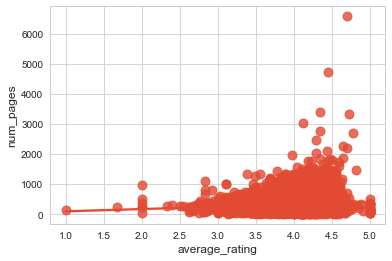

In [141]:
# робастная регрессия
sns.regplot(x='average_rating', y='num_pages', data=db, scatter_kws={'s':80}, robust=True) 

# Вероятность

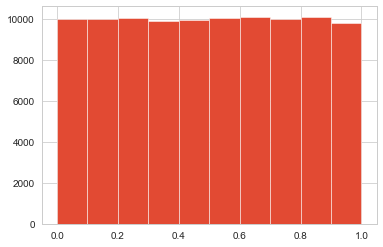

In [142]:
# подбрасываю монетки
np.random.seed(42)
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
_ = plt.hist(random_numbers)
plt.show()

In [143]:
# перемешиваю данные 
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]    
    return perm_sample_1, perm_sample_2

# Приведение к нормальному распределению

In [144]:
"""
# приводится для примера
# способы преобразования признаков, 
# если они не соответствуют нормальному распределению

def logf(x): 
    x = np.log(x+0.01) 
    return x

for x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:
    db[x] = db[x].apply(logf)

"""

"\n# приводится для примера\n# способы преобразования признаков, \n# если они не соответствуют нормальному распределению\n\ndef logf(x): \n    x = np.log(x+0.01) \n    return x\n\nfor x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:\n    db[x] = db[x].apply(logf)\n\n"

In [145]:
"""
# приводится для примера
# способы преобразования признаков, 
# если они не соответствуют нормальному распределению

def sqr(x):
    x = x ** 2
    return x
for x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:
    db[x] = db[x].apply(sqr)
for x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:
    stats.probplot(np.array(db[x]), plot=plt)
    plt.show()

"""

"\n# приводится для примера\n# способы преобразования признаков, \n# если они не соответствуют нормальному распределению\n\ndef sqr(x):\n    x = x ** 2\n    return x\nfor x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:\n    db[x] = db[x].apply(sqr)\nfor x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:\n    stats.probplot(np.array(db[x]), plot=plt)\n    plt.show()\n\n"

In [146]:
"""
# приводится для примера
# преобразование данных к нормальному распределению
# кубический корень

sns.distplot(np.sign(train['average_rating']) * (train['average_rating'].abs() ** (1/3)), fit=norm) 
fig = plt.figure()
res = stats.probplot(np.sign(train['average_rating']) * (train['average_rating'].abs() ** (1/3)), plot=plt)

"""

"\n# приводится для примера\n# преобразование данных к нормальному распределению\n# кубический корень\n\nsns.distplot(np.sign(train['average_rating']) * (train['average_rating'].abs() ** (1/3)), fit=norm) \nfig = plt.figure()\nres = stats.probplot(np.sign(train['average_rating']) * (train['average_rating'].abs() ** (1/3)), plot=plt)\n\n"

In [147]:
"""
# приводится для примера
# преобразование данных к нормальному распределению
# свернутый корень

sns.distplot(np.sign(train['average_rating']) * np.sqrt(np.sqrt(train['average_rating'].abs())), fit=norm) 
fig = plt.figure()
res = stats.probplot(np.sign(train['average_rating']) * np.sqrt(np.sqrt(train['average_rating'].abs())), plot=plt)

"""

"\n# приводится для примера\n# преобразование данных к нормальному распределению\n# свернутый корень\n\nsns.distplot(np.sign(train['average_rating']) * np.sqrt(np.sqrt(train['average_rating'].abs())), fit=norm) \nfig = plt.figure()\nres = stats.probplot(np.sign(train['average_rating']) * np.sqrt(np.sqrt(train['average_rating'].abs())), plot=plt)\n\n"

# Обработка выбросов

In [148]:
"""
# приводится для примера
# удаление выбросов 

for x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:
    q1, q3 = np.percentile(db[x], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    db = db.loc[(db[x] < upper_bound) & (db[x] > lower_bound)]

"""

"\n# приводится для примера\n# удаление выбросов \n\nfor x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:\n    q1, q3 = np.percentile(db[x], [25, 75])\n    iqr = q3 - q1\n    lower_bound = q1 - (iqr * 1.5)\n    upper_bound = q3 + (iqr * 1.5)\n    db = db.loc[(db[x] < upper_bound) & (db[x] > lower_bound)]\n\n"

In [149]:
# еще один способ бороться с выбросами
db3 = db.copy()
db3['ratings_count_log'] = [np.log(x) for x in db3['ratings_count']] 
db3.head(3)

C:\Users\runaz\AppData\Local\Temp/ipykernel_78260/599086070.py:3: RuntimeWarning: divide by zero encountered in log
  db3['ratings_count_log'] = [np.log(x) for x in db3['ratings_count']]


,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,ratings_count_log
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,14.555393
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,14.582450
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000,8.753529


In [150]:
from scipy import stats

In [151]:
db3 = db.copy()
db3 = db3.drop(['title', 'decade', 'quarter', 'tra_co', 'multivolume', 'language_code'], axis=1)

# удаляю выбросы
db_filtered = db3[np.abs(stats.zscore(db3) < 3).all(axis=1)]
db_filtered.head(3)

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
2,4.42,352,6333,244,40,0.000000,0.000000
5,3.74,152,19,1,87,-0.166667,0.166667
7,4.38,815,3628,254,68,0.050000,0.700000


# Машинное обучение 

In [152]:
# отбор признаков с помощью Lasso
# если 0, то можно удалить признак, 
# а можно удалить и просто минимальные значения

X = db.drop(['average_rating', 'title', 'language_code'], axis=1)
y = db['average_rating']
reg_lasso = Lasso(alpha=0.5)
model_lasso = reg_lasso.fit(X, y)
model_lasso.coef_

array([ 2.04725570e-04,  1.06895811e-07, -3.76458764e-07, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.17115014e-04,
        0.00000000e+00,  0.00000000e+00])

In [153]:
"""

# приводится для примера
# правило для импутации

cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='No')) 

# правило для дамми-кодирования
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))

# список этапов
cat_steps = [cat_si_step, cat_ohe_step] 

# задаю исполнение нашего списка этапов
cat_pipe = Pipeline(cat_steps) 

# указываю категориальную переменную

cat_cols = ['tra_co'] 

# обработка количественных переменных
num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler())
num_steps = [num_si_step, num_ss_step]
num_pipe = Pipeline(num_steps)
num_cols = ['num_pages', 'ratings_count', 'text_reviews_count']

transformers = [('cat', cat_pipe, cat_cols), 
                ('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=transformers)


# для обучающего
# это преобразованные признаки
X = ct.fit_transform(X_train) 
X.shape 

# обработка количественных для целевого
num_si_step1 = ('si', SimpleImputer(strategy='median'))
num_ss_step1 = ('ss', StandardScaler())
num_steps1 = [num_si_step1, num_ss_step1]
num_pipe1 = Pipeline(num_steps1)
num_cols1 = ['average_rating']
transformers = [('num', num_pipe1, num_cols1)]
ct1 = ColumnTransformer(transformers=transformers)

# это преобразованный целевой признак. 
y = ct1.fit(y_train)

"""

"\n\n# приводится для примера\n# правило для импутации\n\ncat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='No')) \n\n# правило для дамми-кодирования\ncat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))\n\n# список этапов\ncat_steps = [cat_si_step, cat_ohe_step] \n\n# задаю исполнение нашего списка этапов\ncat_pipe = Pipeline(cat_steps) \n\n# указываю категориальную переменную\n\ncat_cols = ['tra_co'] \n\n# обработка количественных переменных\nnum_si_step = ('si', SimpleImputer(strategy='median'))\nnum_ss_step = ('ss', StandardScaler())\nnum_steps = [num_si_step, num_ss_step]\nnum_pipe = Pipeline(num_steps)\nnum_cols = ['num_pages', 'ratings_count', 'text_reviews_count']\n\ntransformers = [('cat', cat_pipe, cat_cols), \n                ('num', num_pipe, num_cols)]\nct = ColumnTransformer(transformers=transformers)\n\n\n# для обучающего\n# это преобразованные признаки\nX = ct.fit_transform(X_train) \nX.shape \n\n# обработка количественных для ц

In [154]:
"""
# приводится для примера
# пример применение конвейера
# обработка категориальных признаков
cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='No')) 
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore')) 
cat_steps = [cat_si_step, cat_ohe_step] 
cat_pipe = Pipeline(cat_steps) 
cat_cols = ['tra_co'] 
cat_transf = cat_pipe.fit_transform(X[cat_cols])

# обработка количественных переменных
num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler())
num_steps = [num_si_step, num_ss_step]
num_pipe = Pipeline(num_steps)
num_cols = ['num_pages', 'ratings_count', 'text_reviews_count']
num_transf = num_pipe.fit_transform(X[num_cols])


all = Pipeline([('cat', cat_transf), ('num', num_transf)])

"""

"\n# приводится для примера\n# пример применение конвейера\n# обработка категориальных признаков\ncat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='No')) \ncat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore')) \ncat_steps = [cat_si_step, cat_ohe_step] \ncat_pipe = Pipeline(cat_steps) \ncat_cols = ['tra_co'] \ncat_transf = cat_pipe.fit_transform(X[cat_cols])\n\n# обработка количественных переменных\nnum_si_step = ('si', SimpleImputer(strategy='median'))\nnum_ss_step = ('ss', StandardScaler())\nnum_steps = [num_si_step, num_ss_step]\nnum_pipe = Pipeline(num_steps)\nnum_cols = ['num_pages', 'ratings_count', 'text_reviews_count']\nnum_transf = num_pipe.fit_transform(X[num_cols])\n\n\nall = Pipeline([('cat', cat_transf), ('num', num_transf)])\n\n"

In [155]:
"""
# приводится для примера
# способ отбора признаков
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFEалее 
select = RFE(RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1), n_features_to_select=5)
select.fit(X_train_dum, y_train)
X_train_rfe = select.transform(X_train_dum)
X_test_rfe = select.transform(X_test_dum)
mask = select.get_support()
feat_labels = X_train.columns
for c, feature in zip(mask, feat_labels):
    print(feature, c)

"""

'\n# приводится для примера\n# способ отбора признаков\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.feature_selection import RFEалее \nselect = RFE(RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1), n_features_to_select=5)\nselect.fit(X_train_dum, y_train)\nX_train_rfe = select.transform(X_train_dum)\nX_test_rfe = select.transform(X_test_dum)\nmask = select.get_support()\nfeat_labels = X_train.columns\nfor c, feature in zip(mask, feat_labels):\n    print(feature, c)\n\n'

In [156]:
"""
# приводится для примера
# создание признаков для прогнозирования

xfit = np.array([789, 24784, 3857])
xfit = xfit.reshape(1, -1) # обязательно надо преобразовать в матрицу
yfit = model.predict(xfit)

"""

'\n# приводится для примера\n# создание признаков для прогнозирования\n\nxfit = np.array([789, 24784, 3857])\nxfit = xfit.reshape(1, -1) # обязательно надо преобразовать в матрицу\nyfit = model.predict(xfit)\n\n'